# This project is related to customer behavior or purchase items from a shop 
## here try to predict what items have more impact on sale 

Firstly import some libraries for data processing 
1. Pandas
2. numpy
3. matplotlib
4. seaborn it not necessary optional

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### here dataset that is taken from uci and from github repo 

In [54]:
df=pd.read_csv('customers.csv')     #import dataset from cvs file
df.head()    # for seen the dataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [55]:
df.shape   # from dataset info 

(440, 8)

Here seee that dataset have 440 rows and 8 feature 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### all the feature are int and have no null values

In [57]:
df.columns    #see the column or key in the dataset 

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [58]:
df.drop(columns=['Channel','Region'],inplace=True)    #drop those feature that do not give or have any information 

In [59]:
display(df.describe())      


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


creating some sample dataset for seen the impact 

In [60]:
indices = [2,4,5]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,22615,5410,7198,3915,1777,5185
2,9413,8259,5126,666,1795,1451


Initial simple decision tree model on whatout any preprocessing  

In [61]:
from sklearn.model_selection import train_test_split    #train test from sklearn module
from sklearn.tree import DecisionTreeRegressor     #model from sklearn
X=df.drop(columns='Fresh')     #dataset fir traing and test
y=df['Fresh']    
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.20)    #split train and test data
model=DecisionTreeRegressor()    #model initialzing
model.fit(X_train,y_train)      #fit on train data
model.score(X_test,y_test)  #score on unseen data or testing data its also call r2 score

-0.5460788989792837

From above model performance is very bad it can be treet into next step 
firstly check the corr between the each feature 

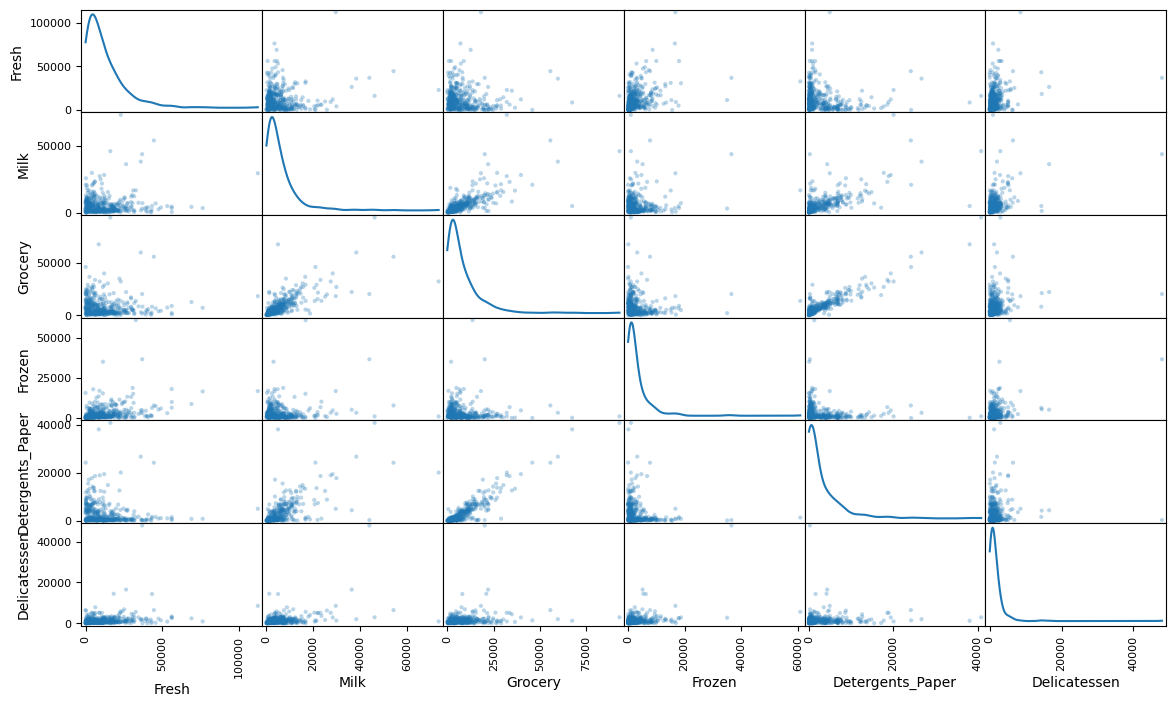

In [62]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [63]:
df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


do preprocessing because model give preferance to some feature as shown above all feature are highly corr to aech other

In [64]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [65]:
col=X.columns

In [66]:
X_scaled=pd.DataFrame(data=X_scaled,columns=col)
X_scaled

,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,0.544458,0.170318,-0.270136,0.086407,0.089151
2,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...
435,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# X=df.drop(columns='Fresh')
# y=df['Fresh']
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42,test_size=.20)
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-0.32967088821255963

In [68]:
df=df.apply(np.log)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X=df.drop(columns='Fresh')
y=df['Fresh']
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42,test_size=.20)
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-0.40654120175533914

outliner treetment

In [70]:
for feature in df.keys():
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    # Calculate the interquartile range (IQR)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    
# OPTIONAL: specify which rows to remove
outliers = []

# Remove the outliers
good_data = df.drop(df.index[outliers]).reset_index(drop=True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [71]:
good_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


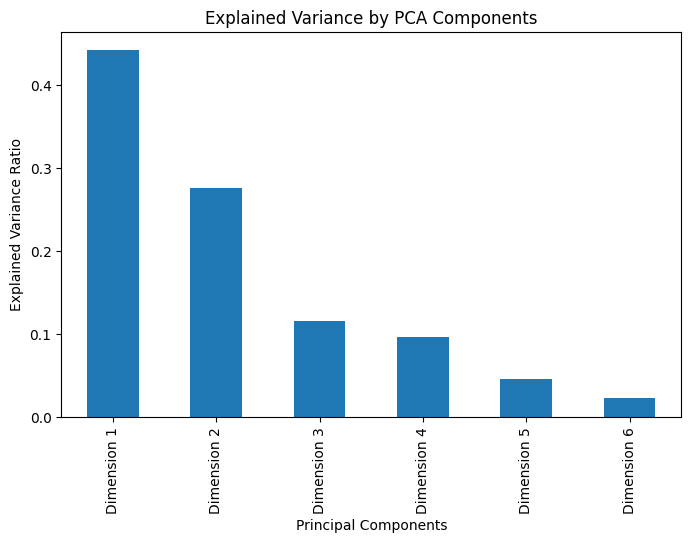

In [74]:
from sklearn.decomposition import PCA
import visuals as vs

# Apply PCA with number of components = number of features
pca = PCA(n_components=len(good_data.columns)).fit(good_data)

# Transform the sample data
# pca_samples = pca.transform(log_samples)

# Generate PCA results plot (custom visualization function)
pca_results =pca_results(good_data, pca)


In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def pca_results(good_data, pca):
    # Dimension labels
    dimensions = ['Dimension {}'.format(i+1) for i in range(len(pca.components_))]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=good_data.keys())
    components.index = dimensions

    # Explained variance
    explained_var = pd.DataFrame(np.round(pca.explained_variance_ratio_, 4), 
                                 index=dimensions, 
                                 columns=['Explained Variance'])

    # Plot explained variance
    plt.figure(figsize=(8,5))
    explained_var['Explained Variance'].plot(kind='bar')
    plt.ylabel("Explained Variance Ratio")
    plt.xlabel("Principal Components")
    plt.title("Explained Variance by PCA Components")
    plt.show()

    return pd.concat([explained_var, components], axis=1)


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
# pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def biplot(good_data, reduced_data, pca):
    fig, ax = plt.subplots(figsize=(10,6))

    # Plot the reduced data
    ax.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], 
               facecolors='b', edgecolors='b', s=40, alpha=0.5)

    # Scale the component vectors for arrows
    vectors = pca.components_.T
    scaling = np.max(reduced_data.values)  # scale arrows to fit plot nicely
    
    for i, feature in enumerate(good_data.columns):
        ax.arrow(0, 0, vectors[i,0]*scaling, vectors[i,1]*scaling,
                 color='r', width=0.005, head_width=0.05)
        ax.text(vectors[i,0]*scaling*1.1, vectors[i,1]*scaling*1.1,
                feature, color='r', ha='center', va='center')

    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_title("PCA Biplot (2D projection with feature vectors)")
    plt.grid(True)
    plt.show()


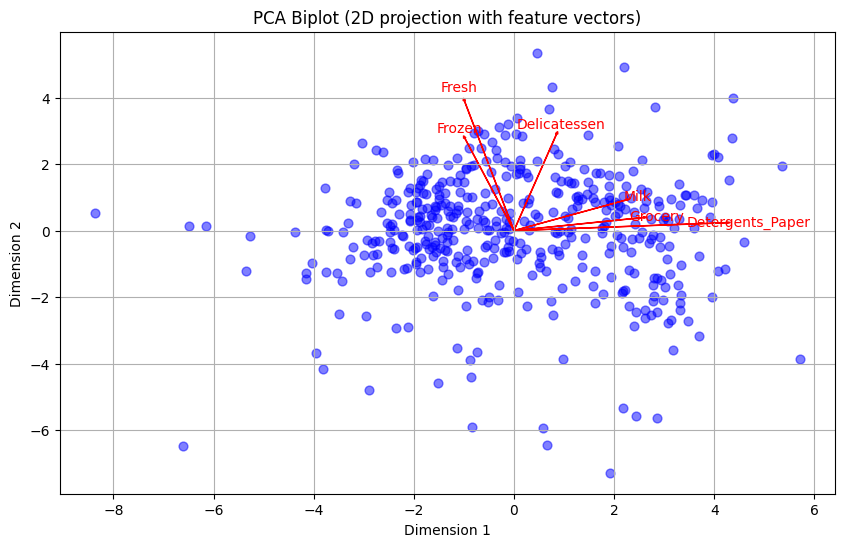

In [ ]:
biplot(good_data, reduced_data, pca)

for clustering check what dataset have make group or cluster to each other

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores=[]
for i in range(2,10):
    cluster=KMeans(n_clusters=i,random_state=25)
    leb=cluster.fit_predict(reduced_data)
    score=silhouette_score(reduced_data,leb)
    scores.append(score)
    print(f'{cluster} in {i} and {scores}')
# pred=cluster.predict(reduced_data)





KMeans(n_clusters=2, random_state=25) in 2 and [0.4191660832029231]
KMeans(n_clusters=3, random_state=25) in 3 and [0.4191660832029231, 0.3504111770717995]
KMeans(n_clusters=4, random_state=25) in 4 and [0.4191660832029231, 0.3504111770717995, 0.35672074669955195]
KMeans(n_clusters=5, random_state=25) in 5 and [0.4191660832029231, 0.3504111770717995, 0.35672074669955195, 0.3320378767673782]
KMeans(n_clusters=6, random_state=25) in 6 and [0.4191660832029231, 0.3504111770717995, 0.35672074669955195, 0.3320378767673782, 0.35075612431836006]
KMeans(n_clusters=7, random_state=25) in 7 and [0.4191660832029231, 0.3504111770717995, 0.35672074669955195, 0.3320378767673782, 0.35075612431836006, 0.36040654213132756]
KMeans(random_state=25) in 8 and [0.4191660832029231, 0.3504111770717995, 0.35672074669955195, 0.3320378767673782, 0.35075612431836006, 0.36040654213132756, 0.3585126923558263]
KMeans(n_clusters=9, random_state=25) in 9 and [0.4191660832029231, 0.3504111770717995, 0.35672074669955195,

In [ ]:
center=cluster.cluster_centers_
center

array([[ 1.30673081e-03,  2.47125136e+00],
       [ 2.90260359e+00, -1.90547849e+00],
       [-1.76292779e+00,  9.11347290e-01],
       [ 1.84082469e-01, -4.18497567e-01],
       [ 1.95966472e-01, -5.05255655e+00],
       [-4.42066557e+00, -1.32154010e+00],
       [ 3.45043919e+00,  1.30396969e+00],
       [-1.72915654e+00, -8.53401836e-01],
       [ 1.82939438e+00,  6.35859283e-01]])

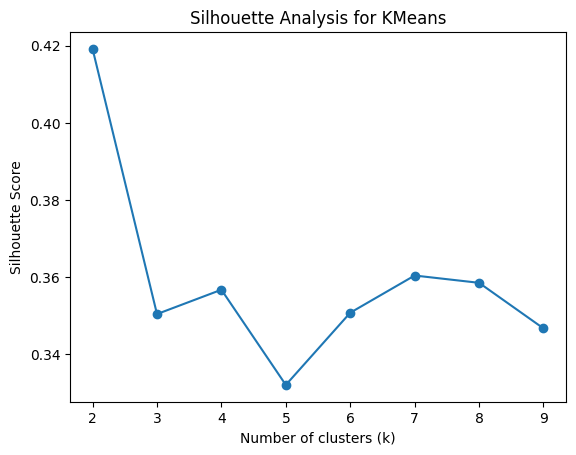

In [ ]:
plt.plot(range(2, 10), scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans")
plt.show()



In [ ]:
# Inverse transform the centers (from PCA space back to log space)
log_centers = pca.inverse_transform(center)

# Exponentiate the centers (from log space back to original space)
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0, len(center))]
true_centers = pd.DataFrame(np.round(true_centers), columns=df.keys())
true_centers.index = segments

display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,33640.0,5029.0,5504.0,4946.0,983.0,2765.0
Segment 1,1013.0,7759.0,15181.0,355.0,7116.0,458.0
Segment 2,15696.0,1946.0,2216.0,3132.0,247.0,959.0
Segment 3,4500.0,3380.0,4894.0,1171.0,998.0,652.0
Segment 4,188.0,1600.0,3568.0,122.0,829.0,62.0
Segment 5,5394.0,475.0,567.0,1666.0,31.0,207.0
Segment 6,8304.0,16218.0,24328.0,1546.0,12246.0,2554.0
Segment 7,4657.0,1481.0,1991.0,1317.0,235.0,392.0
Segment 8,6963.0,7677.0,11120.0,1475.0,3556.0,1426.0


In [ ]:
display(true_centers.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,8928.333333,5062.777778,7707.666667,1747.777778,2915.666667,1052.777778
std,10308.442984,4961.824356,7805.989031,1473.419982,4175.880566,998.840175
min,188.000000,475.000000,567.000000,122.000000,31.000000,62.000000
25%,4500.000000,1600.000000,2216.000000,1171.000000,247.000000,392.000000
50%,5394.000000,3380.000000,4894.000000,1475.000000,983.000000,652.000000
75%,8304.000000,7677.000000,11120.000000,1666.000000,3556.000000,1426.000000
max,33640.000000,16218.000000,24328.000000,4946.000000,12246.000000,2765.000000


In [ ]:
display(df.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768
